In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
task_parameters = {'task_name': '2DIR1O',
 'input_direction_units': 100,
 'delay0_from': 10,
 'delay0_to': 20,
 'delay1_from': 10,
 'delay1_to': 90,
 'delay2_from': 120,
 'delay2_to': 160,
 'show_direction_for': 10,
 'show_cue_for': 100,
 'dim_input': 101,
 'dim_output': 2,
 'distractor_probability': 0.0}
# fix delays at median values for analysis
delay0 = (task_parameters['delay0_from'] + task_parameters['delay0_to']) / 2
delay1 = (task_parameters['delay1_from'] + task_parameters['delay1_to']) / 2
delay2 = (task_parameters['delay2_from'] + task_parameters['delay2_to']) / 2
delay1 = task_parameters["delay1_to"]  # max delay1 (to ensure convergence to final state for analysis)
show_direction_for = task_parameters["show_direction_for"]
show_cue_for = task_parameters["show_cue_for"]

In [20]:
# Updated function to create and save the task progression animation with the specified order of events
def create_task_progression_animation(delay0, delay1, delay2, show_direction_for, show_cue_for):
    # Calculate the total time
    total_time = 2 * show_direction_for + show_cue_for + delay0 + delay1 + delay2
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xlim(0, total_time)
    ax.set_ylim(-.1, .1)
    ax.axis('off')  # No axis for a cleaner look

    # Colored patches for each interval
    current_x = 0
    patches = {}
    patches['delay0'] = plt.Rectangle((current_x, 0), delay0, 1, fc='lightgray', label='delay0')
    current_x += delay0
    patches['show_direction_1'] = plt.Rectangle((current_x, 0), show_direction_for, 1, fc='green', label='show_direction_1')
    current_x += show_direction_for
    patches['delay1'] = plt.Rectangle((current_x, 0), delay1, 1, fc='lightgray', label='delay1')
    current_x += delay1
    patches['show_direction_2'] = plt.Rectangle((current_x, 0), show_direction_for, 1, fc='green', label='show_direction_2')
    current_x += show_direction_for
    patches['delay2'] = plt.Rectangle((current_x, 0), delay2, 1, fc='lightgray', label='delay2')
    current_x += delay2
    patches['show_cue'] = plt.Rectangle((current_x, 0), show_cue_for, 1, fc='red', label='show_cue')

    # Add patches to the axis
    for patch in patches.values():
        ax.add_patch(patch)

    # Add labels for delay names and intervals
    # ax.text(delay0/2, 1.1, 'delay0', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for/2, 1.1, 'show_direction', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for + delay1/2, 1.1, 'delay1', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for*1.5 + delay1, 1.1, 'show_direction', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for*2 + delay1 + delay2/2, 1.1, 'delay2', ha='center', va='bottom')
    # ax.text(total_time - show_cue_for/2, 1.1, 'show_cue', ha='center', va='bottom')

    # Create pointer
    pointer, = ax.plot([], [], lw=4, color='red')

    # Initialize the pointer's position
    def init():
        pointer.set_data([], [])
        return pointer,

    # Update the pointer to the current frame/time
    def animate(frame):
        x = frame / 10.0
        pointer.set_data([x, x], [-.1, 1.1])
        return pointer,

    # Creating the animation with the pointer
    ani = animation.FuncAnimation(fig, animate, init_func=init, frames=int(total_time * 10), interval=100, blit=True)

    # Save the new animation as an MP4 file with the pointer
    mp4_file_with_pointer = 'task_progression_animation_with_corrected_order.mp4'
    ani.save(mp4_file_with_pointer, writer='ffmpeg', fps=60)

    return mp4_file_with_pointer  # Return the new file path for the user to download

'task_progression_animation_with_corrected_order.mp4'

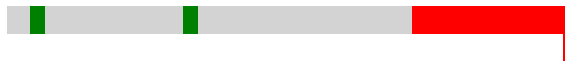

In [21]:
# Example usage of the function with dummy values
mp4_file_with_pointer = create_task_progression_animation(
    delay0, 
    delay1, 
    delay2, 
    show_direction_for, 
    show_cue_for
)

mp4_file_with_pointer  # Return the path to the created animation file

In [10]:
# Updated function to ensure the MP4 video is not cut off
def create_task_progression_animation(delay0, delay1, delay2, show_direction_for, show_cue_for):
    show_cue_for = 0
    
    # Calculate the total time
    total_time = 2 * show_direction_for + show_cue_for + delay0 + delay1 + delay2
    
    # Create figure and axis with a buffer space for labels
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xlim(0, total_time)
    ax.set_ylim(0, 1)
    #fig.subplots_adjust(top=0.8)  # Adjust the top space to make room for text labels
    ax.axis('off')  # No axis for a cleaner look

    # Define the patches with the correct intervals
    patches = {
        'delay0': plt.Rectangle((0, 0), delay0, 1, fc='lightgray', label='delay0'),
        'show_direction_1': plt.Rectangle((delay0, 0), show_direction_for, 1, fc='grey', label='show_direction_1'),
        'delay1': plt.Rectangle((delay0 + show_direction_for, 0), delay1, 1, fc='lightgray', label='delay1'),
        'show_direction_2': plt.Rectangle((delay0 + show_direction_for + delay1, 0), show_direction_for, 1, fc='grey', label='show_direction_2'),
        'delay2': plt.Rectangle((delay0 + show_direction_for * 2 + delay1, 0), delay2, 1, fc='lightgray', label='delay2'),
        'show_cue': plt.Rectangle((delay0 + show_direction_for * 2 + delay1 + delay2, 0), show_cue_for, 1, fc='black', label='show_cue'),
    }

    # Add patches to the axis
    for patch in patches.values():
        ax.add_patch(patch)

    # Add labels for delay names and intervals
    # ax.text(delay0 / 2, 1.1, 'delay0', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for / 2, 1.1, 'show_direction', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for + delay1 / 2, 1.1, 'delay1', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for * 1.5 + delay1, 1.1, 'show_direction', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for * 2 + delay1 + delay2 / 2, 1.1, 'delay2', ha='center', va='bottom')
    # ax.text(total_time - show_cue_for / 2, 1.1, 'show_cue', ha='center', va='bottom')

    # Create pointer
    pointer, = ax.plot([], [], lw=10, color='black')

    # Initialize the pointer's position
    def init():
        pointer.set_data([], [])
        return pointer,

    # Update the pointer to the current frame/time
    def animate(frame):
        x = frame / 10.0
        pointer.set_data([x, x], [0, 1])
        return pointer,

    # Creating the animation with the pointer
    ani = animation.FuncAnimation(fig, animate, init_func=init, frames=int(total_time * 10), interval=100, blit=True)

    # Save the new animation as an MP4 file with the pointer
    # Apply tight_layout to adjust the spacing
    fig.tight_layout()
    mp4_file_with_pointer = 'task_progression_animation_with_corrected_order.mp4'
    ani.save(mp4_file_with_pointer, writer='ffmpeg', fps=60, dpi=300, bitrate=1600, extra_args=['-vcodec', 'libx264', '-crf', '22'])

    return mp4_file_with_pointer  # Return the new file path for the user to download

'task_progression_animation_with_corrected_order.mp4'

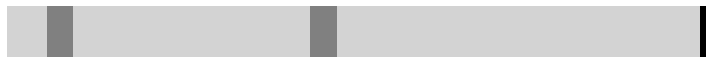

In [11]:
# Example usage of the function with dummy values
mp4_file_with_pointer = create_task_progression_animation(
    delay0, 
    delay1, 
    delay2, 
    show_direction_for, 
    show_cue_for
)

mp4_file_with_pointer  # Return the path to the created animation file

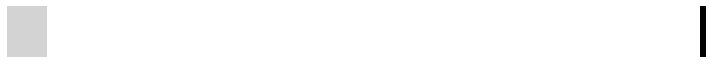

In [12]:
def create_task_progression_animation(delay0, delay1, delay2, show_direction_for, show_cue_for):
    show_cue_for = 0
    
    # Calculate the total time
    total_time = 2 * show_direction_for + show_cue_for + delay0 + delay1 + delay2
    
    # Create figure and axis with a buffer space for labels
    fig, ax = plt.subplots(figsize=(10, 1))
    ax.set_xlim(0, total_time)
    ax.set_ylim(0, 1)
    #fig.subplots_adjust(top=0.8)  # Adjust the top space to make room for text labels
    ax.axis('off')  # No axis for a cleaner look

    # Define the patches with the correct intervals
    patches = {
        'delay0': plt.Rectangle((0, 0), delay0, 1, fc='lightgray', label='delay0'),
        'show_direction_1': plt.Rectangle((delay0, 0), show_direction_for, 1, fc='grey', label='show_direction_1'),
        'delay1': plt.Rectangle((delay0 + show_direction_for, 0), delay1, 1, fc='lightgray', label='delay1'),
        'show_direction_2': plt.Rectangle((delay0 + show_direction_for + delay1, 0), show_direction_for, 1, fc='grey', label='show_direction_2'),
        'delay2': plt.Rectangle((delay0 + show_direction_for * 2 + delay1, 0), delay2, 1, fc='lightgray', label='delay2'),
        'show_cue': plt.Rectangle((delay0 + show_direction_for * 2 + delay1 + delay2, 0), show_cue_for, 1, fc='black', label='show_cue'),
    }

    # Add patches to the axis
    for patch in patches.values():
        ax.add_patch(patch)

    # Add labels for delay names and intervals
    # ax.text(delay0 / 2, 1.1, 'delay0', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for / 2, 1.1, 'show_direction', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for + delay1 / 2, 1.1, 'delay1', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for * 1.5 + delay1, 1.1, 'show_direction', ha='center', va='bottom')
    # ax.text(delay0 + show_direction_for * 2 + delay1 + delay2 / 2, 1.1, 'delay2', ha='center', va='bottom')
    # ax.text(total_time - show_cue_for / 2, 1.1, 'show_cue', ha='center', va='bottom')

    # Create pointer
    pointer, = ax.plot([], [], lw=10, color='black')

    # Initialize the pointer's position
    def init():
        pointer.set_data([], [])
        return pointer,

    # Update the pointer to the current frame/time
    def animate(frame):
        x = frame / 10.0
        pointer.set_data([x, x], [0, 1])
        return pointer,

    # Creating the animation with the pointer
    ani = animation.FuncAnimation(fig, animate, init_func=init, frames=int(total_time * 10), interval=100, blit=True)

    # Save the new animation as an MP4 file with the pointer
    # Apply tight_layout to adjust the spacing
    fig.tight_layout()
    mp4_file_with_pointer = 'task_progression_animation_with_corrected_order.mp4'
    ani.save(mp4_file_with_pointer, writer='ffmpeg', fps=60, dpi=300, bitrate=1600, extra_args=['-vcodec', 'libx264', '-crf', '22'])

    return mp4_file_with_pointer  # Return the new file path for the user to download

mp4_file_with_pointer = create_task_progression_animation(
    delay0, 
    delay1, 
    delay2, 
    show_direction_for, 
    show_cue_for
)